In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd
import qutip as qutip

In [2]:
data = np.loadtxt("process_tomography_20221230.txt")

In [3]:
data

array([[ 0.00000000e+00,  1.67243707e+09, -3.55230554e-07,
         7.21101571e-07,  2.89981557e-07,  4.94318385e-07],
       [ 0.00000000e+00,  1.67243707e+09, -1.59679757e-07,
         6.06803326e-07,  9.23335648e-08,  5.22287849e-07],
       [ 0.00000000e+00,  1.67243707e+09, -1.61177297e-07,
         6.34254832e-07,  1.16405431e-07,  5.28206840e-07],
       ...,
       [ 1.00000000e+00,  1.67244463e+09, -4.12760187e-07,
         8.98039104e-07,  5.66632309e-07,  3.86833278e-07],
       [ 1.00000000e+00,  1.67244463e+09, -4.23741994e-07,
         7.11243899e-07,  4.37095139e-07,  3.40027213e-07],
       [ 1.00000000e+00,  1.67244463e+09, -4.01653608e-07,
         6.85164935e-07,  3.72699503e-07,  3.50537505e-07]])

In [4]:
time_h = []
time_d = []

In [5]:
vh_h = []
vh_d = []

In [6]:
da_h = []
da_d = []

In [7]:
for i,d in enumerate(data):
    if i%8 != 0:
        if d[0] == 0:
            time_h.append(datetime.datetime.fromtimestamp(d[1]))
            vh = d[3]/d[2]
            vh_h.append(np.abs(vh))
            pd = d[4]/(d[5]+d[4])
            pa = d[5]/(d[5]+d[4])
            da_h.append((pd-pa)/(2*np.sin(np.arctan(vh))))
        elif d[0] == 1:
            time_d.append(datetime.datetime.fromtimestamp(d[1]))
            vh = d[3]/d[2]
            vh_d.append(np.abs(vh))
            pd = d[4]/(d[5]+d[4])
            pa = d[5]/(d[5]+d[4])
            da_d.append((pd-pa)/(2*np.sin(np.arctan(vh))))

Text(0.5, 1.0, 'Rantoul Loop VH Polarization')

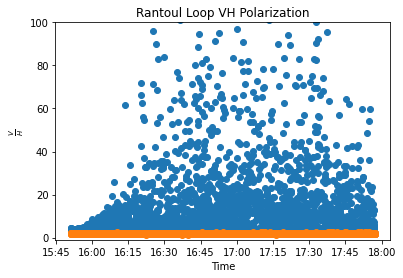

In [8]:
fig, ax = plt.subplots()
#ax2 = ax.twinx()
ax.plot(time_h,vh_h,label='H',ls='',marker='o')
ax.plot(time_d,vh_d,label='D',ls='',marker='o')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\frac{V}{H}$")
ax.set_ylim(bottom=-1,top=100)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")

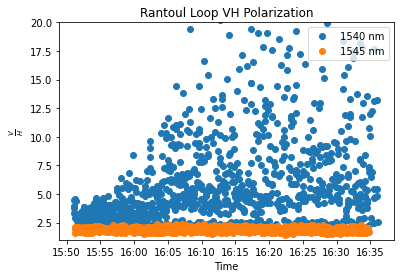

In [9]:
fig, ax = plt.subplots()
num_points = 1000
ax.plot(time_h[:num_points],vh_h[:num_points],label='1540 nm',ls='',marker='o')
ax.plot(time_d[:num_points],vh_d[:num_points],label='1545 nm',ls='',marker='o')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\frac{V}{H}$")
ax.set_ylim(bottom=1,top=20)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(loc=1)

In [10]:
avg_vh_h = np.mean(np.array(vh_h)[:-6].reshape(-1, 8), axis=1)
avg_vh_d = np.mean(np.array(vh_d).reshape(-1, 8), axis=1)

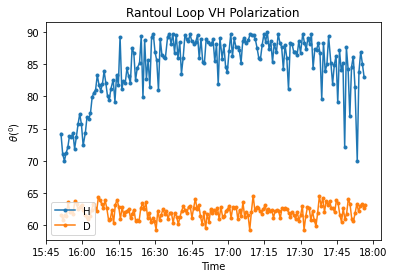

In [12]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_h[::8][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h[:num_points][::2])),label='H',ls='-',marker='.')
ax.plot(time_d[::8][:num_points][::2],np.degrees(np.arctan(avg_vh_d[:num_points][::2])),label='D',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(loc=3)
#plt.savefig('vh_drift_20221214.pdf')

In [13]:
avg_da_h = np.mean(np.array(da_h)[:-6].reshape(-1, 8), axis=1)
avg_da_d = np.mean(np.array(da_d).reshape(-1, 8), axis=1)

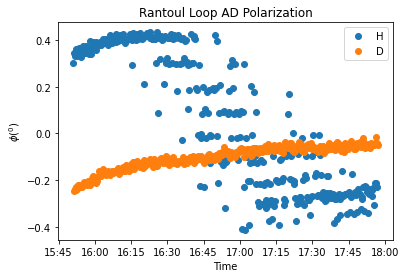

In [14]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_h[::8][:num_points][:-1],avg_da_h[:num_points],label='H',ls='',marker='o')
ax.plot(time_d[::8][:num_points],avg_da_d[:num_points],label='D',ls='',marker='o')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(loc=1)

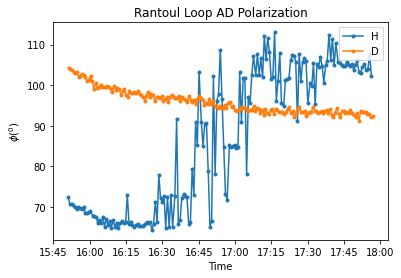

In [15]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_h[::8][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h[:num_points][::2])),label='H',ls='-',marker='.')
ax.plot(time_d[::8][:num_points][::2],np.degrees(np.arccos(avg_da_d[:num_points][::2])),label='D',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax.set_ylim(bottom=44.99,top=45.01)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(loc=1)
#plt.savefig("ad_drift_20221214.pdf")

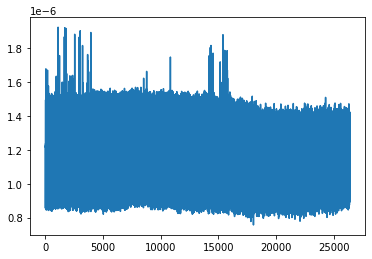

In [16]:
tot = []
for d in data:
    tot.append(d[2]+d[3])
plt.plot(tot)

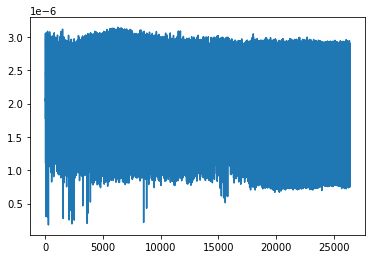

In [17]:
tot = []
for d in data:
    tot.append(d[3]+d[5])
plt.plot(tot)

In [32]:
data[-6:]

array([[ 1.55500000e+03,  1.67111548e+09, -1.31226955e-07,
         1.07597498e-06,  1.61163189e-06,  1.59969750e-06],
       [ 1.55500000e+03,  1.67111549e+09, -1.25736051e-07,
         1.08233871e-06,  1.63152231e-06,  1.60056766e-06],
       [ 1.56000000e+03,  1.67111549e+09, -9.81567609e-08,
         1.08845302e-06,  1.66471477e-06,  1.66471477e-06],
       [ 1.56000000e+03,  1.67111549e+09,  9.58216788e-07,
         3.72609122e-07,  1.77063180e-06,  1.70524163e-06],
       [ 1.56000000e+03,  1.67111549e+09,  9.53849167e-07,
         3.86546589e-07,  1.72774298e-06,  1.74875231e-06],
       [ 1.56000000e+03,  1.67111549e+09,  9.64955689e-07,
         3.63404467e-07,  1.76715093e-06,  1.76180538e-06]])

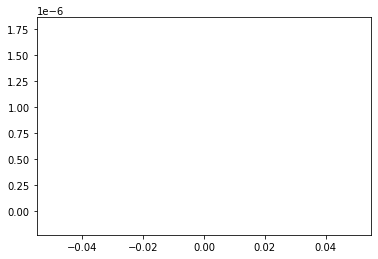